In [1]:
# Import necessary libraries
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Read data from the given .csv file
df = pd.read_csv('cleaned_retractions35215_V10.csv')
df.iloc[:,:11].head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,OriginalPaperDate
0,50792,A fractional order nonlinear model of the love...,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,Research Article;,8/1/2024,3/4/2023
1,50782,Investigation of automotive digital mirrors er...,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,Research Article;,6/1/2024,12/1/2021
2,50781,Optical spectroscopic analysis of bandpass fil...,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,Research Article;,9/1/2024,5/5/2020
3,50731,THz Design Variable Estimation by Deep Optimiz...,(B/T) Computer Science;(B/T) Technology;,"School of Computing Science and Engineering, V...","Terahertz Devices, Circuits and Systems",Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,Book Chapter/Reference Work;,27/09/2022,27/09/2022
4,50727,A Study on Glycyrrhiza glabra-Fortified Bread:...,(BLS) Biochemistry;(ENV) Food Science;(HSC) Nu...,"Department of Mechanical Engineering, Aarupada...",Bioinorganic Chemistry and Applications,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,Research Article;,16/08/2023,30/08/2022


In [3]:
df.iloc[:,11:].head()

,Reason,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,Duplication of Article;Euphemisms for Duplicat...,5,Q1,0.900000,315.000000,280,2,3,7,Academic misconduct and no scientific error;Sc...,1,0,304,0,The most serious
1,Fake Peer Review;Investigation by Journal/Publ...,2,Q3,0.290000,23.000000,1089,3,2,5,Scientific error and academic misconduct;Scien...,1,0,1115,0,The most serious
2,Concerns/Issues with Peer Review;Fake Peer Rev...,14,Q3,0.290000,23.000000,1344,5,5,6,Scientific error and academic misconduct;Scien...,1,0,1367,0,The most serious
3,Date of Retraction/Other Unknown;Euphemisms fo...,0,Q5,1.458473,157.555562,0,4,3,5,Academic misconduct and no scientific error;No...,1,0,492,0,Serious
4,Concerns/Issues About Data;Concerns/Issues Abo...,2,Q1,0.764000,48.000000,351,8,4,10,Scientific error and no academic misconduct;No...,3,1,520,0,Less serious


## Feature Engineering 

### 'Subject'

In [4]:
def extract_and_remove_duplicates(subject):
    # Use regex to extract values inside parentheses
    values_in_parentheses = re.findall(r'\(([^)]*)\)', subject)
    seen = set()
    result = []

    for value in values_in_parentheses:
        if value in seen:
            continue
        seen.add(value)
        result.append(value)

    # Join the unique values with semicolons
    return ";".join(result)

# Apply the function to the 'Subject' column
df['Subject'] = df['Subject'].apply(extract_and_remove_duplicates)

# Display the resulting column
df['Subject']

0            B/T;PHY
1                PHY
2                PHY
3                B/T
4        BLS;ENV;HSC
            ...     
35210        BLS;HSC
35211            BLS
35212            BLS
35213            BLS
35214            BLS
Name: Subject, Length: 35215, dtype: object

## Encoding categorical data to numerical data

### Features that are binary data

Already converted to '0' and '1' in the data wrangling file.

In [5]:
df[['IsPaywalled', 'IsInternationalCollaboration']].head()

,IsPaywalled,IsInternationalCollaboration
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


### Encode target variable which is an ordinal data

In [6]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'LevelOfSeriousness' column and replace it
df['LevelOfSeriousness'] = ordinal_encoder.fit_transform(df[['LevelOfSeriousness']])
df['LevelOfSeriousness']

0        3.0
1        3.0
2        3.0
3        1.0
4        0.0
        ... 
35210    3.0
35211    3.0
35212    3.0
35213    3.0
35214    2.0
Name: LevelOfSeriousness, Length: 35215, dtype: float64

In [7]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'LevelOfSeriousness' column and replace it
df['SJR Best Quartile'] = ordinal_encoder.fit_transform(df[['SJR Best Quartile']])
df['SJR Best Quartile']

0        1.0
1        3.0
2        3.0
3        5.0
4        1.0
        ... 
35210    5.0
35211    1.0
35212    1.0
35213    2.0
35214    2.0
Name: SJR Best Quartile, Length: 35215, dtype: float64

### Features that are nominal data

#### Label Encoding

We apply label encoding which replaces each category in the dataset.

In [8]:
# Identify nominal features to apply label encoding
nominal_features = ['Journal', 'ArticleType']

# Initialize the LabelEncoder
label_encoders = {feature: LabelEncoder() for feature in nominal_features}

# Apply label encoding to each nominal feature
for feature in nominal_features:
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Display the resulting DataFrame
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,...,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,50792,A fractional order nonlinear model of the love...,B/T;PHY,"Department of Mathematical Sciences, College o...",4884,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,56,8/1/2024,...,280,2,3,7,Academic misconduct and no scientific error;Sc...,1,0,304,0,3.0
1,50782,Investigation of automotive digital mirrors er...,PHY,"Department of Physics, Faculty of Science, Cai...",3474,Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,56,6/1/2024,...,1089,3,2,5,Scientific error and academic misconduct;Scien...,1,0,1115,0,3.0
2,50781,Optical spectroscopic analysis of bandpass fil...,PHY,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",3474,Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,56,9/1/2024,...,1344,5,5,6,Scientific error and academic misconduct;Scien...,1,0,1367,0,3.0
3,50731,THz Design Variable Estimation by Deep Optimiz...,B/T,"School of Computing Science and Engineering, V...",5106,Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,10,27/09/2022,...,0,4,3,5,Academic misconduct and no scientific error;No...,1,0,492,0,1.0
4,50727,A Study on Glycyrrhiza glabra-Fortified Bread:...,BLS;ENV;HSC,"Department of Mechanical Engineering, Aarupada...",964,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,56,16/08/2023,...,351,8,4,10,Scientific error and no academic misconduct;No...,3,1,520,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35210,5,Effect of Perindopril on Large Artery Stiffnes...,BLS;HSC,"Alfred and Baker Medical Unit, Baker Heart Res...",2818,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,24,22/12/2015,...,3002,8,6,5,Scientific error and academic misconduct;No sc...,1,0,5965,0,3.0
35211,4,MtvR is a global small noncoding regulatory RN...,BLS,Institute for Biotechnology and Bioengineering...,2922,American Society for Microbiology,Portugal,Christian G Ramos;AndrÃ© M Grilo;Paulo J P da ...,56,1/11/2014,...,519,5,4,3,Scientific error and academic misconduct;Acade...,1,0,3898,0,3.0
35212,3,"The second RNA chaperone, Hfq2, is also requir...",BLS,IBBâInstitute for Biotechnology and Bioengin...,2922,American Society for Microbiology,Portugal,Christian G Ramos;SÃ­lvia A Sousa;AndrÃ© M Gri...,56,1/11/2014,...,1373,5,4,3,Academic misconduct and no scientific error;Sc...,1,0,4752,0,3.0
35213,2,Regulation of Wnt/beta-catenin pathway by cPLA...,BLS,"Department of Pathology, University of Pittsbu...",2988,Wiley,United States,Chang Han;Kyu Lim;Lihong Xu;Guiying Li;Tong Wu,56,29/01/2015,...,2387,5,4,4,Scientific error and academic misconduct;Acade...,1,0,5677,0,3.0


#### Frequency Encoding

We apply frequency encoding which replaces each category with its frequency of occurrence in the dataset.

In [9]:
# Identify nominal features
nominal_features = ['Subject', 'Institution', 'Publisher', 'Country', 'Author']

# Apply frequency encoding for each nominal feature
for feature in nominal_features:
    # Split the string into a list of values and flatten it
    splitted_feature = df[feature].str.split(';').apply(lambda x: x if isinstance(x, list) else [x])
    all_values = [item for sublist in splitted_feature for item in sublist]
    value_counts = pd.Series(all_values).value_counts(normalize=True)  # Get frequencies as percentages
    
    # Apply frequency encoding: calculate the average frequency for multiple values in a data point
    df[feature + '_Encoded'] = splitted_feature.apply(lambda x: np.mean([value_counts[val] for val in x if val in value_counts]))

# Drop the original nominal features
df.drop(columns=nominal_features, inplace=True)

# Rename the encoded columns to the original feature names if needed
df.rename(columns={f"{nf}_Encoded": nf for nf in nominal_features}, inplace=True)

# Display the first few rows
df.head()

,Record ID,Title,Journal,ArticleType,RetractionDate,OriginalPaperDate,Reason,CitationCount,SJR Best Quartile,SJR,...,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
0,50792,A fractional order nonlinear model of the love...,4884,56,8/1/2024,3/4/2023,Duplication of Article;Euphemisms for Duplicat...,5,1.0,0.900000,...,1,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010
1,50782,Investigation of automotive digital mirrors er...,3474,56,6/1/2024,12/1/2021,Fake Peer Review;Investigation by Journal/Publ...,2,3.0,0.290000,...,1,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009
2,50781,Optical spectroscopic analysis of bandpass fil...,3474,56,9/1/2024,5/5/2020,Concerns/Issues with Peer Review;Fake Peer Rev...,14,3.0,0.290000,...,1,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008
3,50731,THz Design Variable Estimation by Deep Optimiz...,5106,10,27/09/2022,27/09/2022,Date of Retraction/Other Unknown;Euphemisms fo...,0,5.0,1.458473,...,1,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009
4,50727,A Study on Glycyrrhiza glabra-Fortified Bread:...,964,56,16/08/2023,30/08/2022,Concerns/Issues About Data;Concerns/Issues Abo...,2,1.0,0.764000,...,3,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009


In [10]:
# Drop unnecessary columns
# Columns to be dropped
columns_to_drop = ['Record ID', 'Title', 'RetractionDate', 'OriginalPaperDate', 'Reason_group', 'CountryCount', 'ReasonCount', 'SubjectCount', 'AuthorCount', 'Reason']

# Drop the columns from the DataFrame
new_df = df.drop(columns=columns_to_drop, axis=1)

# Check the DataFrame after dropping the columns
new_df.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009
4,964,56,2,1.0,0.764000,48.000000,351,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009


### K-means and PCA

In [11]:
df2 = new_df.drop('LevelOfSeriousness', axis=1)
df2.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,Subject,Institution,Publisher,Country,Author
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,0.194505,0.125899,0.028624,0.001657,0.000010
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,0.156626,0.062955,0.099475,0.011070,0.000009
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,0.156626,0.062955,0.099475,0.011070,0.000008
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,0.232383,0.050368,0.099475,0.064331,0.000009
4,964,56,2,1.0,0.764000,48.000000,351,1,520,0,0.166709,0.035978,0.116854,0.024918,0.000009


In [12]:
df2.shape

(35215, 15)

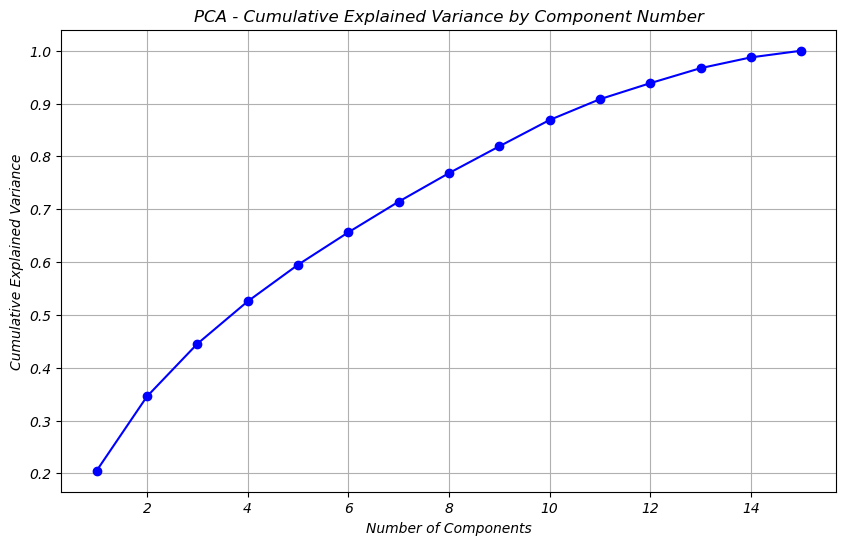

In [13]:
# Standardizing the features
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Calculating PCA for different numbers of components and storing the explained variance ratio
variance_ratios = []
components_range = range(1, 16)  # Since we have 15 features, we'll test up to 16 components

for k in components_range:
    pca = PCA(n_components=k)
    pca.fit(df2_scaled)
    variance_ratios.append(sum(pca.explained_variance_ratio_))

# Plotting the cumulative explained variance against the number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, variance_ratios, marker='o', linestyle='-', color='b')
plt.title('PCA - Cumulative Explained Variance by Component Number')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

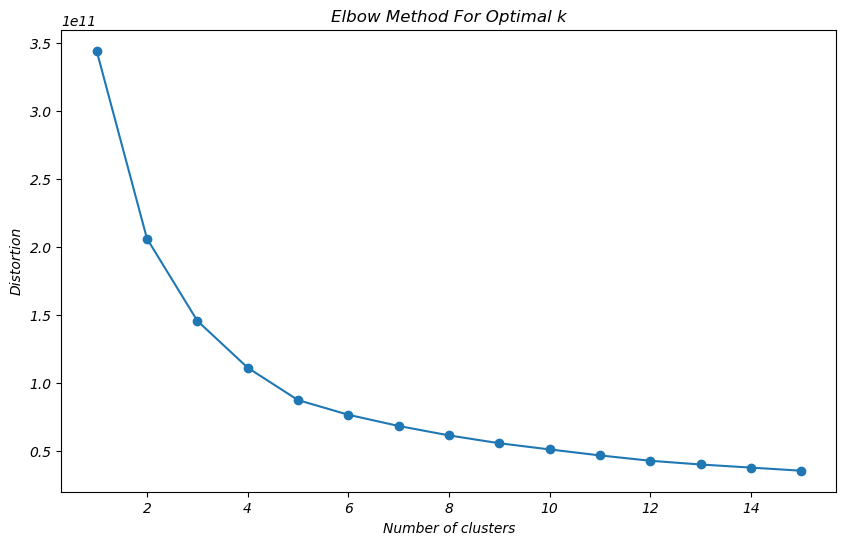

In [14]:
# Calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, random_state=0, n_init=10, max_iter=300)
    km.fit(df2)
    distortions.append(km.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

From the chart above, the optimal K = 3

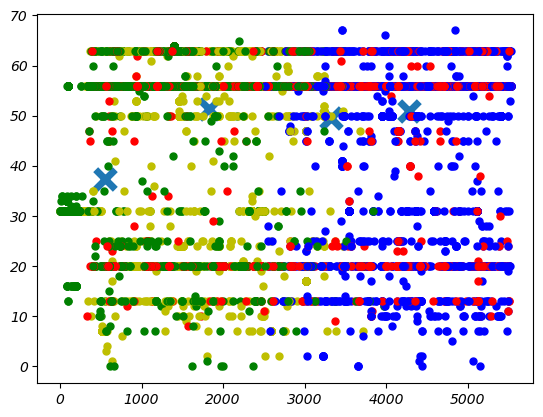

In [15]:
# Data
X = df2.values  # Convert DataFrame to numpy array
# Train K-means with k=4 and n_init is clearly defined
kmeans = KMeans(n_clusters=4, n_init=10)  
kmeans.fit(X)

# Predict labels of data points
labels = kmeans.predict(X)

# centroids of clusters
centers = kmeans.cluster_centers_

# Display results
colors = ['r.', 'b.', 'g.','y.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=5)
plt.show()

In [16]:
# Add the labels to the DataFrame, adjusted to start at 1
new_df['Cluster'] = labels + 1

# Now DataFrame 'new_df' has a new column 'Cluster' with values 1, 2, and 3
new_df

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author,Cluster
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010,2
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009,2
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008,2
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009,2
4,964,56,2,1.0,0.764000,48.000000,351,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35210,2818,24,171,5.0,1.458473,157.555562,3002,0,5965,0,3.0,0.228665,0.000013,0.001335,0.009965,0.000023,1
35211,2922,56,3,1.0,1.057000,273.000000,519,0,3898,0,3.0,0.256035,0.000010,0.004004,0.002041,0.000012,2
35212,2922,56,27,1.0,1.057000,273.000000,1373,0,4752,0,3.0,0.256035,0.000010,0.004004,0.002041,0.000012,3
35213,2988,56,21,2.0,0.768000,186.000000,2387,0,5677,0,3.0,0.256035,0.000040,0.059066,0.099414,0.000040,1


##### Print out centroids of clusters

In [26]:
from scipy.spatial.distance import cdist

# Centroids of the clusters
centers = kmeans.cluster_centers_

# Compute distances from each data point to each centroid
distances = cdist(X, centers)

# Find the index of the closest data point to each centroid
closest_indices = np.argmin(distances, axis=0)

# Print the rows in df2 that correspond to the closest indices
centroid_rows = df2.iloc[closest_indices]

# Print the centroids for verification
print("Centroids:")
print(centers)
centroid_rows

Centroids:
[[3.31723081e+03 4.95203660e+01 5.99940968e+01 2.67237308e+00
  2.34899680e+00 2.37866984e+02 3.26841913e+03 1.64698937e-01
  7.37901181e+03 6.40495868e-02 2.13221714e-01 5.55288967e-02
  4.51147874e-02 7.94244421e-02 8.62684054e-05]
 [4.27560020e+03 5.09005212e+01 1.56822430e+01 3.16004673e+00
  1.38849074e+00 1.53647469e+02 8.30676941e+02 1.64270309e-01
  2.38337662e+03 2.30050324e-02 2.03601332e-01 6.32660278e-02
  5.77804971e-02 2.57870626e-01 3.62744096e-05]
 [5.56790584e+02 3.74825800e+01 7.36082863e+00 4.24585687e+00
  1.50664990e+00 1.61949127e+02 3.32294915e+02 6.65725047e-02
  4.79763117e+03 7.29755179e-02 1.90473763e-01 7.99120366e-02
  1.67178353e-01 3.62009874e-01 3.24696229e-05]
 [1.82738794e+03 5.13150114e+01 9.11558686e+00 3.09246949e+00
  1.18563246e+00 1.30244769e+02 5.68730132e+02 1.41184641e-01
  1.34701855e+03 8.23494394e-03 2.01253783e-01 5.90563641e-02
  7.10502098e-02 3.31228602e-01 3.23521835e-05]]


,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,Subject,Institution,Publisher,Country,Author
23299,3433,56,76,5.0,1.458473,157.555562,3154,1,7670,0,0.228665,0.062955,0.059066,0.012655,0.000008
20013,4315,56,0,2.0,0.789000,177.000000,784,0,2319,0,0.228665,0.125899,0.001363,0.493324,0.000094
34487,606,56,44,1.0,3.289000,101.000000,250,0,4832,0,0.256035,0.000010,0.099475,0.064331,0.000026
12675,1842,56,41,5.0,1.458473,157.555562,539,1,1314,0,0.137590,0.062955,0.099475,0.252581,0.000007


In [29]:
# Print the rows in df that correspond to the closest indices

df3 = pd.read_csv('cleaned_retractions35215_V10.csv')
centroids = df3.iloc[closest_indices]
centroids.iloc[:,:11]

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,OriginalPaperDate
23299,787,Activation of Capsaicin-sensitive Primary Sens...,(BLS) Biology - Cellular;(BLS) Biology - Gener...,"Department of Anaesthetics and Intensive Care,...",Journal of Neurochemistry (JNC),Wiley,Switzerland;United Kingdom,Jatinder Ahluwalia;Mohammed Yaqoob;Laszlo Urba...,Research Article;,21/09/2011,1/2/2003
20013,21747,Relationship between rs1801157 polymorphism in...,(BLS) Biology - Cellular;(BLS) Genetics;(HSC) ...,"Department of Rheumatology, Southwest Hospital...",Oncotarget,Impact Journals,China,Can Qian;Qinghua Zou;Yong Wang,Research Article;,19/11/2019,26/09/2017
34487,919,Gold nanoparticles inhibit vascular endothelia...,(BLS) Biochemistry;(BLS) Biology - Cellular;,"Department of Biotechnology, Division of Molec...",Angiogenesis,Springer,India,Kalimuthu Kalishwaralal;Sardarpasha Sheikpranb...,Research Article;,17/07/2011,9/11/2010
12675,34833,"The relationship between urbanization, technol...",(B/T) International Relations;(B/T) Technology...,"School of Business, Qingdao University, Qingda...",Environmental Science and Pollution Research I...,Springer,China;Pakistan,Azka Amin;Babar Aziz;Xi Hua Liu,Research Article;,18/12/2021,27/06/2020


In [30]:
centroids.iloc[:,11:]

,Reason,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
23299,Falsification/Fabrication of Data;Investigatio...,76,Q5,1.458473,157.555562,3154,5,6,5,Scientific error and academic misconduct;No sc...,2,1,7670,0,The most serious
20013,Unreliable Results;,0,Q2,0.789000,177.000000,784,3,4,2,Scientific error and no academic misconduct,1,0,2319,0,Less serious
34487,Ethical Violations by Author;Manipulation of I...,44,Q1,3.289000,101.000000,250,6,3,3,Scientific error and academic misconduct,1,0,4832,0,The most serious
12675,Investigation by Company/Institution;Plagiaris...,41,Q5,1.458473,157.555562,539,3,5,3,Academic misconduct and no scientific error;No...,2,1,1314,0,Serious


In [31]:
# Print each value of each column for each centroid row using a for loop
for idx, row in centroids.iterrows():
    print(f"Centroid {idx}:")
    for col in centroids.columns:
        print(f"  {col}: {row[col]}")
    print()  # Add an empty line for better readability

Centroid 23299:
  Record ID: 787
  Title: Activation of Capsaicin-sensitive Primary Sensory Neurones Induces Anandamide Production and Release
  Subject: (BLS) Biology - Cellular;(BLS) Biology - General;(BLS) Biology - Molecular;(BLS) Neuroscience;(HSC) Medicine - Pharmacology;
  Institution: Department of Anaesthetics and Intensive Care, Imperial College, Faculty of Medicine, Chelsea and Westminster Hospital, London, UK; Novartis Institute of Medical Sciences, London, UK; The Drug Discovery Center, Novartis Pharma AG, Basel, Switzerland;
  Journal: Journal of Neurochemistry (JNC)
  Publisher: Wiley
  Country: Switzerland;United Kingdom
  Author: Jatinder Ahluwalia;Mohammed Yaqoob;Laszlo Urban;Stuart Bevan;Istvan Nagy
  ArticleType: Research Article;
  RetractionDate: 21/09/2011
  OriginalPaperDate: 1/2/2003
  Reason: Falsification/Fabrication of Data;Investigation by Company/Institution;Misconduct - Official Investigation/Finding;Misconduct by Author;
  CitationCount: 76
  SJR Best Qu

#### Save the new DataFrame to a new CSV file

In [77]:
new_df.to_csv('encoded_retractions35215_V10.csv', index=False)

Now, we have a new encoded dataset ready for predictive modeling.